# Zeisel, A. et al. Mouse Cortex

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")
from SCCAF import *
import urllib.request

Populating the interactive namespace from numpy and matplotlib


In [2]:
urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1hprRFkEk8q27kqrt9RLvY6aqu6XWPb2C", 'Zeisel.h5')
ad = sc.read(filename="Zeisel.h5")

In [3]:
sc.tl.louvain(ad, resolution=1, key_added = 'louvain_r1')

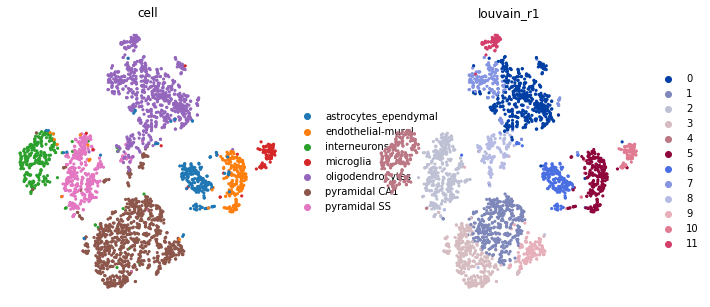

In [4]:
figsize(5,5)
sc.pl.tsne(ad, color=['cell','louvain_r1'], frameon=False)

## SCCAF assessment
> use self-projection to test the global accuracy of a clustering (the human expert clustering). 
We find the discrimination between the human annotated cell types is very clear and the accuracy is up to 96%. It shows an almost-perfect clustering.

Mean CV accuracy: 0.9538
Accuracy on the training set: 0.9985
Accuracy on the hold-out set: 0.9588


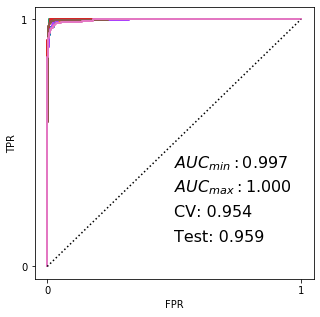

In [5]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(ad.X, ad.obs['cell'],n=100)
aucs = plot_roc(y_prob, y_test, clf, cvsm=cvsm, acc=acc)
plt.show()

## SCCAF recover
When the data annotation is unknown and we aim to identify the best clustering solution. 
We may start with a `over-clustering` and optimize the clustering by merging the clusters that cannot be discriminated by a machine learning model. 
(Here we use `logistic regression`, which uses a linear model, for the machine learning.) And we also constrain the optimization with a `under-clustering`.

In this example, we start with louvain clustering resolution 1.5 (`louvain_r1.5`).

We assign the optimization name (the `prefix` parameter) as `L1`, and the initial state of the optimization is named as `L1_Round0` kept in the `anndata.obs` slot.
Each Round of the optimization will increase the index, from `L1_Round1`, `L1_Round2` to `L1_Round10` ....

In [6]:
ad.obs['L1_Round0'] = ad.obs['louvain_r1']

start_iter: 0
R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.8925
Accuracy on the training set: 0.9990
Accuracy on the hold-out set: 0.9045


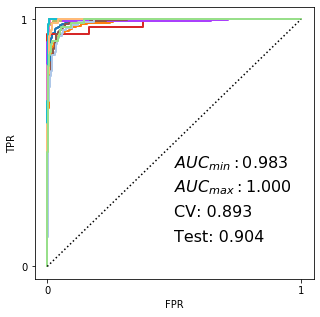

... storing 'L1_Round0_self-projection' as categorical


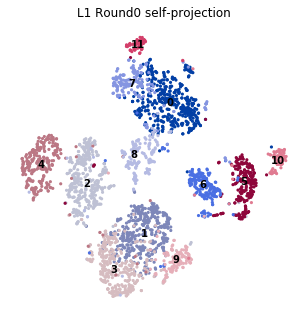

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9025
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9040
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9035
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8920
Max R1mat: 0.253731
Max R2mat: 0.018630
min_acc: 0.892000


<Figure size 360x360 with 0 Axes>

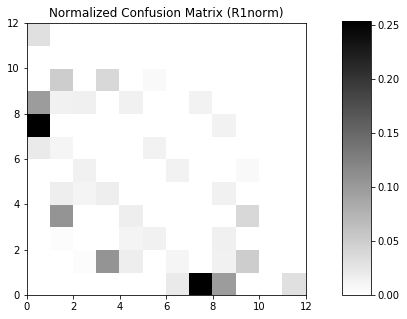

<Figure size 360x360 with 0 Axes>

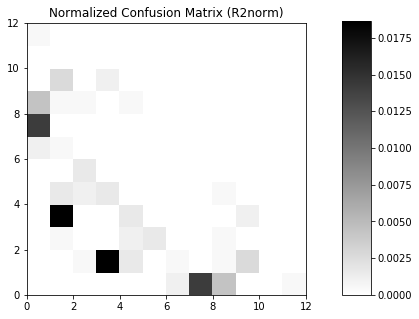

IGRAPH U-W- 12 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.253731
m2: 0.018630
Accuracy: 0.892000
start_iter: 0
R1norm_cutoff: 0.243731
R2norm_cutoff: 0.017630
Accuracy: 0.892000
Round1 ...
Mean CV accuracy: 0.8934
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9005


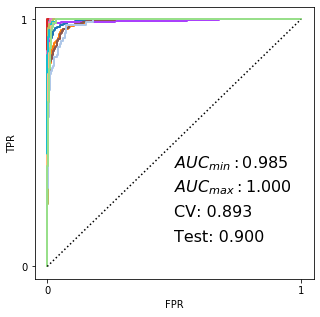

... storing 'L1_Round0_self-projection' as categorical


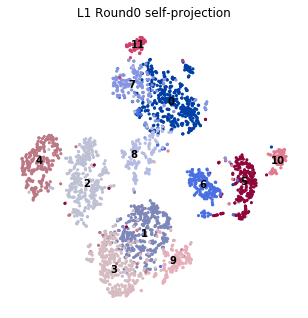

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8995
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8990
Accuracy on the training set: 0.9990
Accuracy on the hold-out set: 0.8890
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8985
Max R1mat: 0.306667
Max R2mat: 0.023810
min_acc: 0.889000


<Figure size 360x360 with 0 Axes>

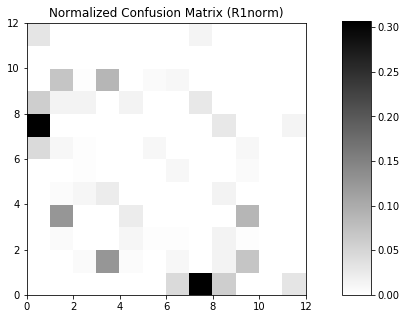

<Figure size 360x360 with 0 Axes>

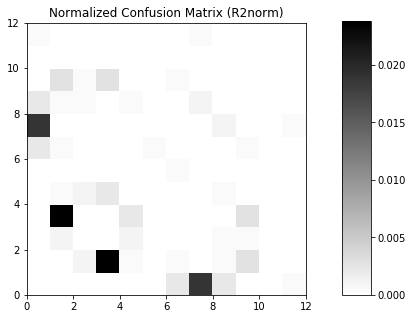

... storing 'L1_Round1' as categorical


IGRAPH U-W- 12 4 --
+ attr: weight (e)
+ edges:
0--7 1--3 1--3 0--7


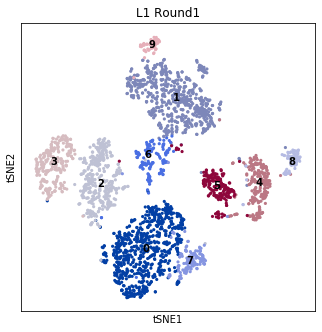

Round2 ...
Mean CV accuracy: 0.9484
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9507


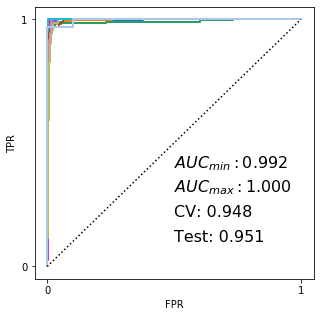

... storing 'L1_Round1_self-projection' as categorical


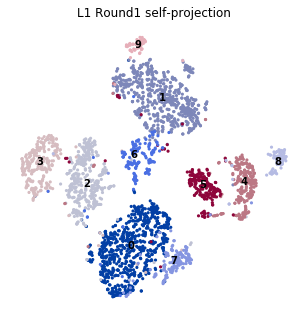

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9457
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9457
Accuracy on the training set: 0.9988
Accuracy on the hold-out set: 0.9553
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9406
Max R1mat: 0.296875
Max R2mat: 0.010942
min_acc: 0.940639


<Figure size 360x360 with 0 Axes>

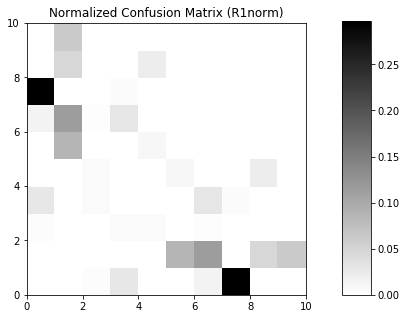

<Figure size 360x360 with 0 Axes>

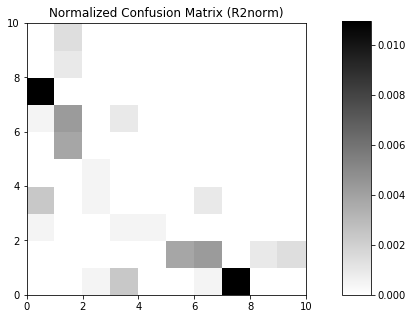

... storing 'L1_Round2' as categorical


IGRAPH U-W- 10 2 --
+ attr: weight (e)
+ edges:
0--7 0--7


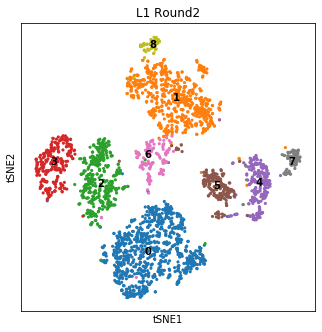

Round3 ...
Mean CV accuracy: 0.9519
Accuracy on the training set: 0.9987
Accuracy on the hold-out set: 0.9553


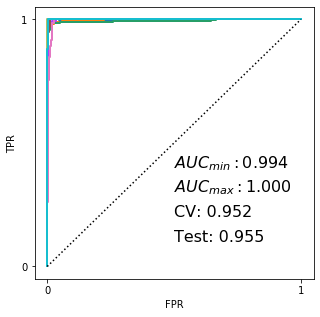

... storing 'L1_Round2_self-projection' as categorical


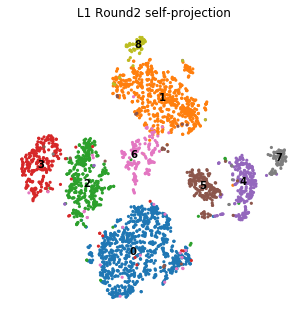

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9588
Accuracy on the training set: 0.9987
Accuracy on the hold-out set: 0.9566
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9522
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9655
Max R1mat: 0.171429
Max R2mat: 0.005952
min_acc: 0.952170


<Figure size 360x360 with 0 Axes>

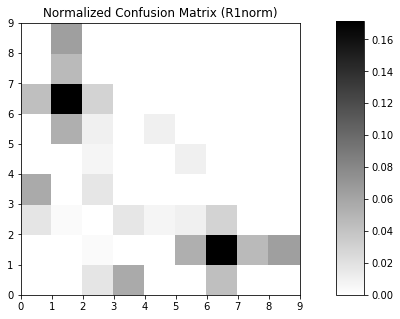

<Figure size 360x360 with 0 Axes>

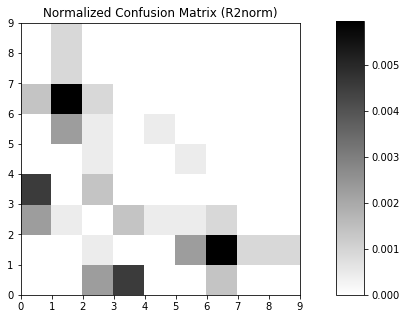

IGRAPH U-W- 9 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.171429
m2: 0.005952
Accuracy: 0.952170
start_iter: 2
R1norm_cutoff: 0.161429
R2norm_cutoff: 0.004952
Accuracy: 0.952170
Round3 ...
Mean CV accuracy: 0.9732
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9566


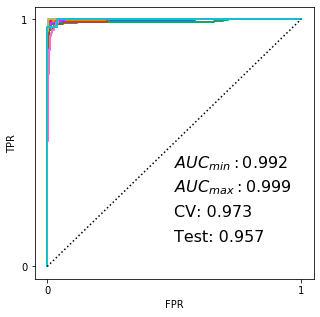

... storing 'L1_Round2_self-projection' as categorical


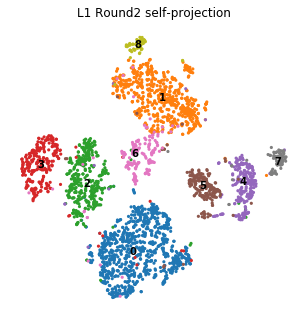

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9486
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9566
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9575
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9632
Max R1mat: 0.153846
Max R2mat: 0.004617
min_acc: 0.948627


<Figure size 360x360 with 0 Axes>

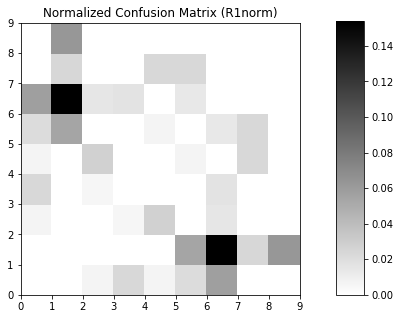

<Figure size 360x360 with 0 Axes>

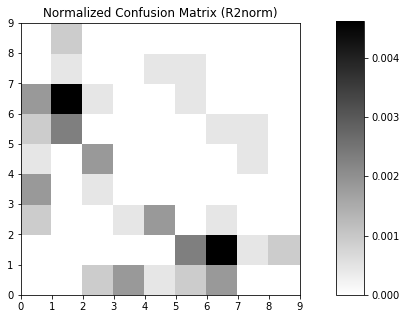

IGRAPH U-W- 9 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.153846
m2: 0.004617
Accuracy: 0.948627
start_iter: 2
R1norm_cutoff: 0.143846
R2norm_cutoff: 0.003617
Accuracy: 0.948627
Round3 ...
Mean CV accuracy: 0.9533
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9588


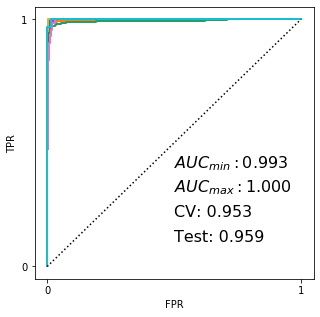

... storing 'L1_Round2_self-projection' as categorical


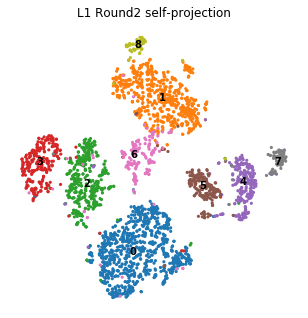

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9579
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9637
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9597
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9531
Max R1mat: 0.173913
Max R2mat: 0.005500
Converge SCCAF_optimize min_acc!
m1: 0.173913
m2: 0.005500
Accuracy: 0.953056


In [7]:
SCCAF_optimize_all(min_acc=0.953, ad=ad, basis ='tsne',c_iter=5) # use='pca'

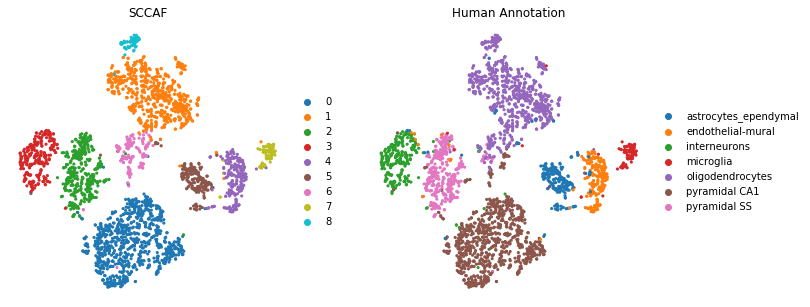

In [8]:
sc.pl.tsne(ad, color=['L1_result','cell',],frameon=False, title=['SCCAF','Human Annotation'])

## SCCAF recover with constraints

In this example, we start with louvain clustering resolution 1.5 (`louvain_r1.5`) and constrain the optimization with louvain clustering resolution 0.2 (`louvain_r0.2`).

In [9]:
sc.tl.louvain(ad, resolution=0.2, key_added='louvain_r0.2')

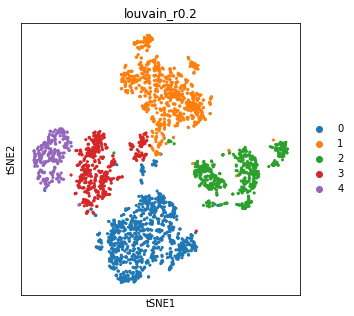

In [10]:
sc.pl.tsne(ad, color=['louvain_r0.2'])

In [11]:
ad.obs['L2_Round0'] = ad.obs['L1_Round0']

start_iter: 0
R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9036
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8920


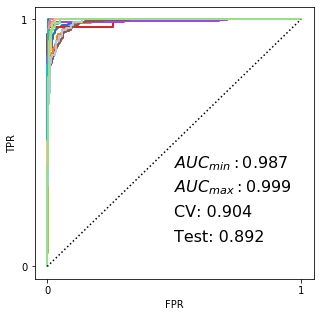

... storing 'L2_Round0_self-projection' as categorical


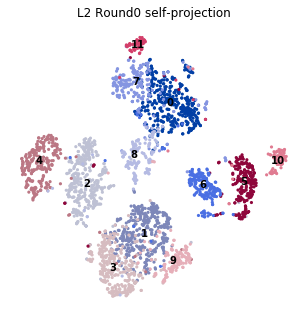

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9035
Accuracy on the training set: 0.9990
Accuracy on the hold-out set: 0.8945
Max R1mat: 0.314286
Max R2mat: 0.025000
min_acc: 0.892000


<Figure size 360x360 with 0 Axes>

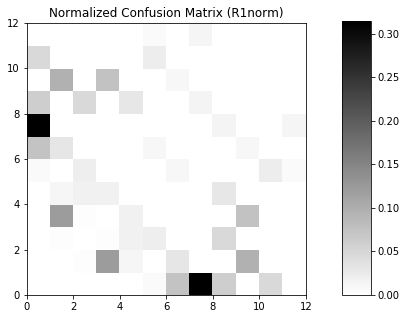

<Figure size 360x360 with 0 Axes>

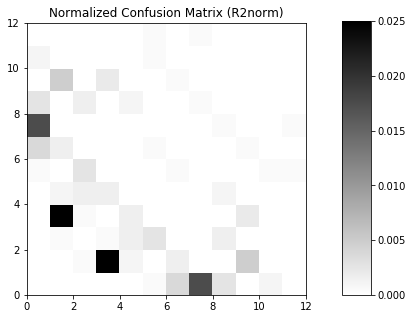

IGRAPH U-W- 12 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.314286
m2: 0.025000
Accuracy: 0.892000
start_iter: 0
R1norm_cutoff: 0.304286
R2norm_cutoff: 0.024000
Accuracy: 0.892000
Round1 ...
Mean CV accuracy: 0.9122
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8935


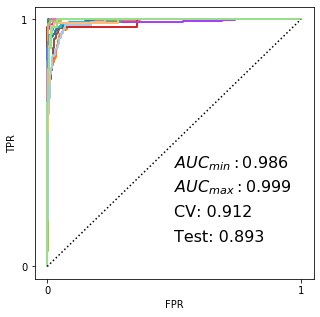

... storing 'L2_Round0_self-projection' as categorical


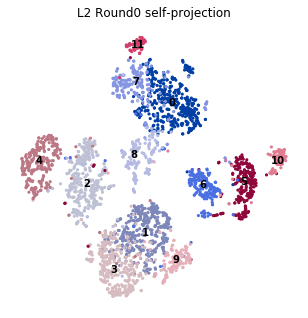

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8945
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9000
Max R1mat: 0.371795
Max R2mat: 0.019681
min_acc: 0.893500


<Figure size 360x360 with 0 Axes>

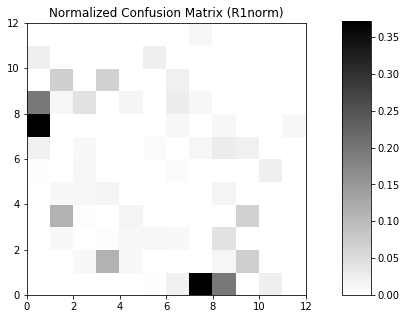

<Figure size 360x360 with 0 Axes>

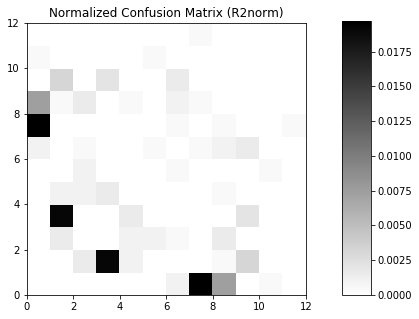

... storing 'L2_Round1' as categorical


IGRAPH U-W- 12 2 --
+ attr: weight (e)
+ edges:
0--7 0--7


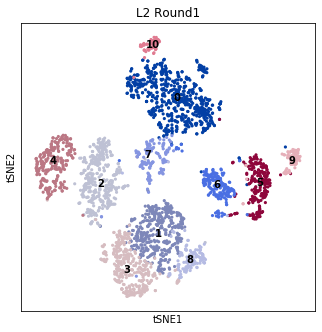

Round2 ...
Mean CV accuracy: 0.9169
Accuracy on the training set: 0.9989
Accuracy on the hold-out set: 0.9191


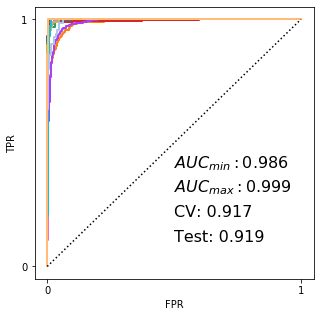

... storing 'L2_Round1_self-projection' as categorical


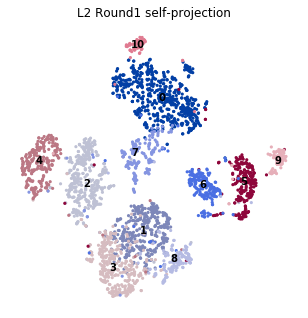

Accuracy on the training set: 0.9989
Accuracy on the hold-out set: 0.9268
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9206
Max R1mat: 0.230769
Max R2mat: 0.026329
min_acc: 0.919139


<Figure size 360x360 with 0 Axes>

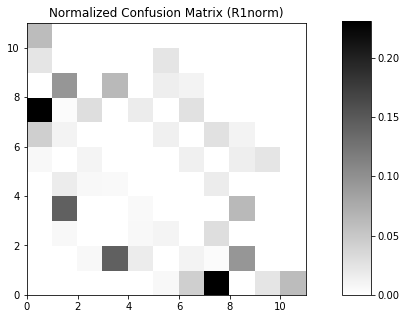

<Figure size 360x360 with 0 Axes>

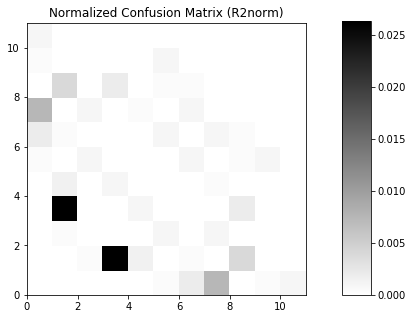

IGRAPH U-W- 11 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.230769
m2: 0.026329
Accuracy: 0.919139
start_iter: 1
R1norm_cutoff: 0.220769
R2norm_cutoff: 0.025329
Accuracy: 0.919139
Round2 ...
Mean CV accuracy: 0.9204
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9239


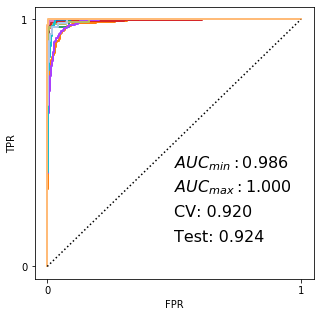

... storing 'L2_Round1_self-projection' as categorical


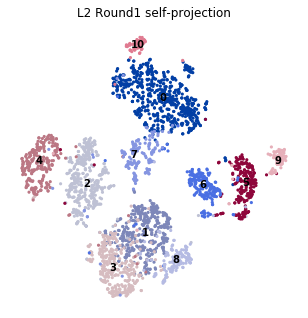

Accuracy on the training set: 0.9989
Accuracy on the hold-out set: 0.9311
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9134
Max R1mat: 0.212121
Max R2mat: 0.021148
min_acc: 0.913397


<Figure size 360x360 with 0 Axes>

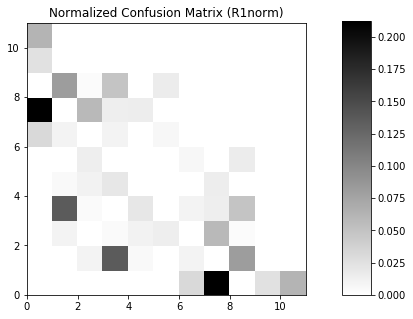

<Figure size 360x360 with 0 Axes>

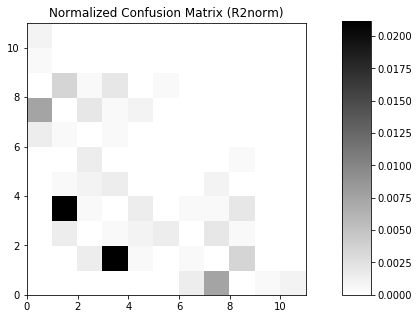

IGRAPH U-W- 11 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.212121
m2: 0.021148
Accuracy: 0.913397
start_iter: 1
R1norm_cutoff: 0.202121
R2norm_cutoff: 0.020148
Accuracy: 0.913397
Round2 ...
Mean CV accuracy: 0.9302
Accuracy on the training set: 0.9989
Accuracy on the hold-out set: 0.9191


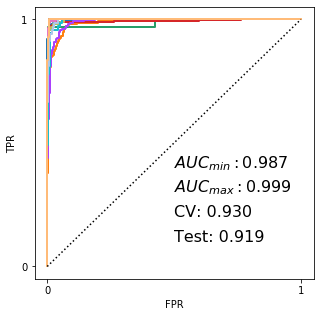

... storing 'L2_Round1_self-projection' as categorical


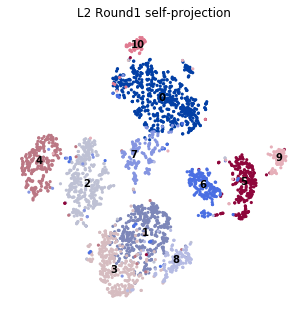

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9191
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9278
Max R1mat: 0.164179
Max R2mat: 0.023940
min_acc: 0.919139


<Figure size 360x360 with 0 Axes>

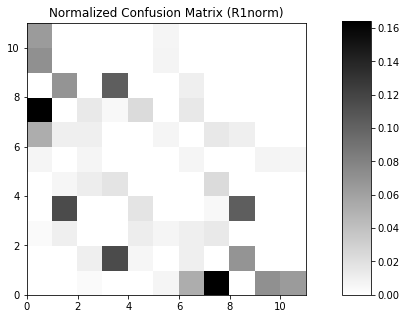

<Figure size 360x360 with 0 Axes>

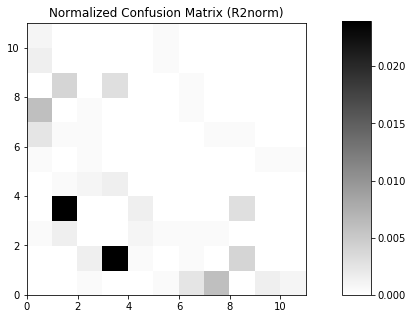

IGRAPH U-W- 11 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.164179
m2: 0.023940
Accuracy: 0.919139
start_iter: 1
R1norm_cutoff: 0.154179
R2norm_cutoff: 0.022940
Accuracy: 0.919139
Round2 ...
Mean CV accuracy: 0.9213
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9057


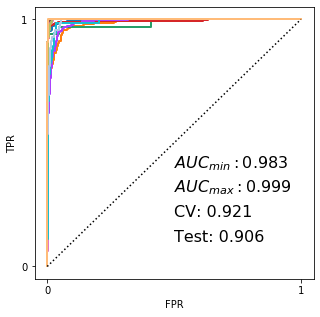

... storing 'L2_Round1_self-projection' as categorical


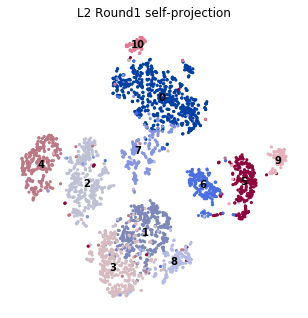

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9172
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9254
Max R1mat: 0.257576
Max R2mat: 0.020770
min_acc: 0.905742


<Figure size 360x360 with 0 Axes>

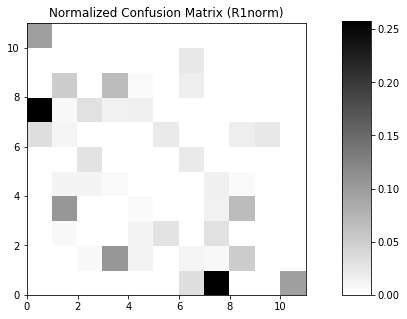

<Figure size 360x360 with 0 Axes>

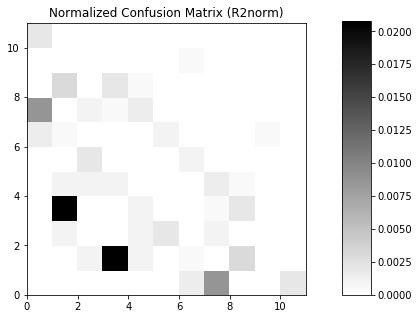

... storing 'L2_Round2' as categorical


IGRAPH U-W- 11 2 --
+ attr: weight (e)
+ edges:
0--7 0--7


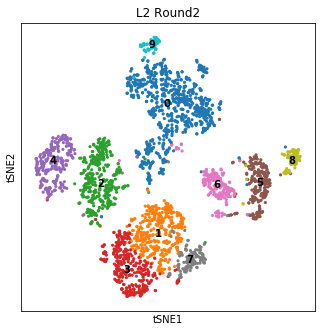

Round3 ...
Mean CV accuracy: 0.9275
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9270


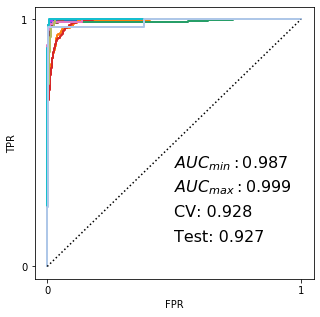

... storing 'L2_Round2_self-projection' as categorical


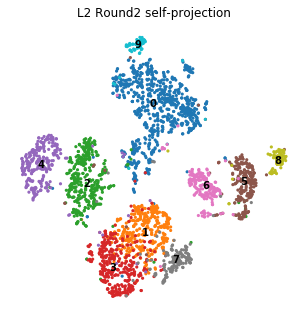

Accuracy on the training set: 0.9988
Accuracy on the hold-out set: 0.9265
Accuracy on the training set: 0.9988
Accuracy on the hold-out set: 0.9242
Max R1mat: 0.158416
Max R2mat: 0.022201
min_acc: 0.924179


<Figure size 360x360 with 0 Axes>

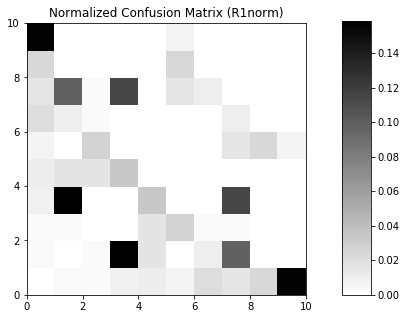

<Figure size 360x360 with 0 Axes>

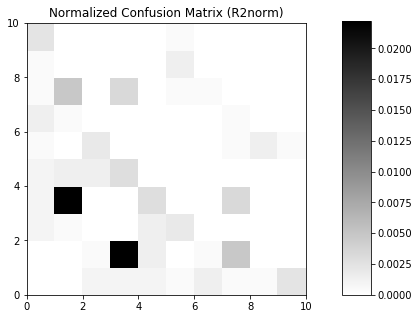

... storing 'L2_Round3' as categorical


IGRAPH U-W- 10 4 --
+ attr: weight (e)
+ edges:
0--9 1--3 1--3 0--9


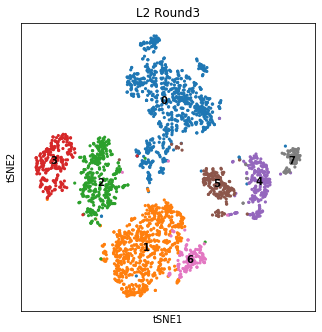

Round4 ...
Mean CV accuracy: 0.9479
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9564


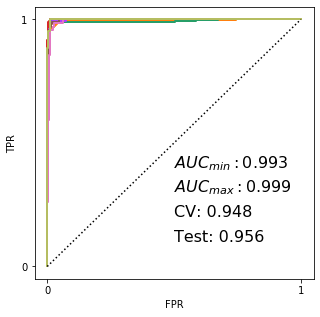

... storing 'L2_Round3_self-projection' as categorical


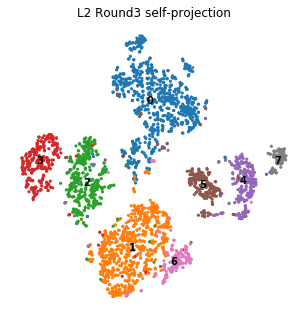

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9560
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9525
Max R1mat: 0.254237
Max R2mat: 0.007658
min_acc: 0.952505


<Figure size 360x360 with 0 Axes>

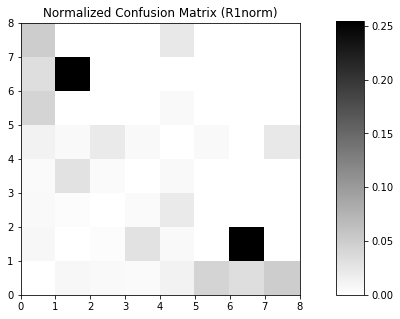

<Figure size 360x360 with 0 Axes>

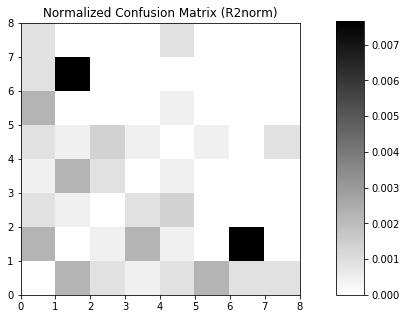

... storing 'L2_Round4' as categorical


IGRAPH U-W- 8 2 --
+ attr: weight (e)
+ edges:
1--6 1--6


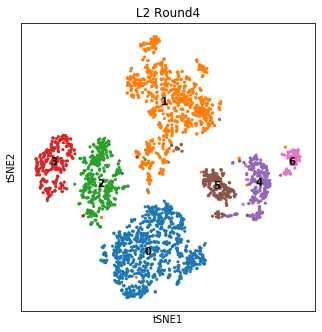

Round5 ...
Mean CV accuracy: 0.9689
Accuracy on the training set: 0.9984
Accuracy on the hold-out set: 0.9598


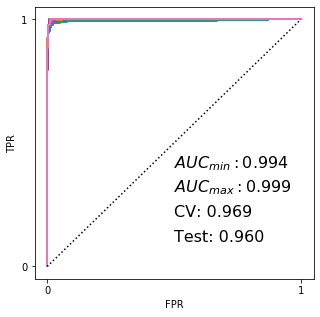

... storing 'L2_Round4_self-projection' as categorical


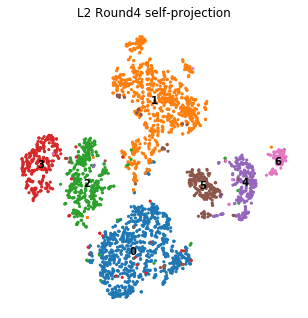

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9721
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9661
Max R1mat: 0.057143
Max R2mat: 0.004340
Converge SCCAF_optimize min_acc!
m1: 0.057143
m2: 0.004340
Accuracy: 0.959797


In [12]:
SCCAF_optimize_all(min_acc=0.955, ad=ad, basis ='tsne',low_res='louvain_r0.2', prefix='L2') # use='pca'

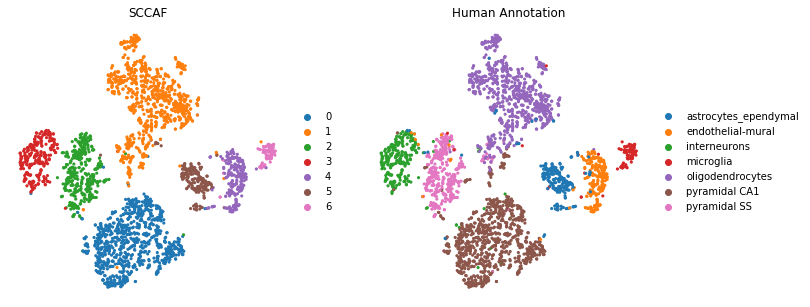

In [13]:
sc.pl.tsne(ad, color=['L2_result','cell',],frameon=False, title=['SCCAF','Human Annotation'])

# End